## <font color="orange"><b>Ecuaciones diferenciales ordinarias de orden superior</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">

<b>Nota</b>: <i>En la unidad anterior vimos que las ecuaciones diferenciales de primer orden se pueden usar para modelar una variedad de situaciones físicas. Sin embargo, muchas situaciones físicas necesitan ser modelado por ecuaciones diferenciales de orden superior (no es posible avanzar mucho en el análisis de mecánica de fluidos, transferencia de calor, vibraciones mecánicas o fenómenos electromagnéticos sin darse cuenta que es necesario resolver ED lineales de segundo orden). En esta unidad, discutimos varios métodos para resolver ecuaciones diferenciales de orden superior.</i>

</font>
</div>

*    <font color="gren"><b>Definiciones preliminares y notación</b></font>

*    <font color="gren"><b>EDO homogéneas con coeficientes constantes</b></font>

*    <font color="gren"><b>EDO no homogéneas con coeficientes constantes</b></font>

*    <font color="gren"><b>Ecuación de Cauchy-Euler</b></font>

*    <font color="gren"><b>Soluciones en serie</b></font>

*    <font color="gren"><b>EDO no lineales</b></font>

### <font color="gren"><b>Definiciones preliminares y notación</b></font>

#### <font color="cyan"><b>Introducción</b></font>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>La <b>ecuación de Van-der-Pol</b>, que surge en el estudio del amortiguamiento no lineal, es una EDO de segundo orden no lineal</i>

\begin{equation*}
	\frac{d^2 x}{dt^2} + \mu(x^2 - 1)\frac{dx}{dt} + x = 0
\end{equation*}

<i>Si $x(0) = 1$ y $x'(0) = 0$ grafique la solución de la ecuación de Van-der-Pol en el intervalo $[0, 15]$ para $\mu = 1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4$ y $8$. Compare le gráfica de la solución con la gráfica de la solución  de un oscilador simple no amortiguado, $x'' + x = 0$ con $x(0) = 1$ y $x'(0) = 0$</i>

</font>
</div>

<b>Solución:</b>

<i>Resolveremos el problema con la ayuda de Wolfram Language:</i>

In [1]:
(*Definiremos primero la función vanderpol*)
vanderpol[mu_] := NDSolve[{x''[t] + mu*(x[t]^2 - 1)*x'[t] + x[t] == 0, x[0] == 1, x'[0] ==0}, x[t], {t,0,15}]

{{x[t] -> InterpolatingFunction[{{0., 15.}}, <>][t]}}
-Graphics-
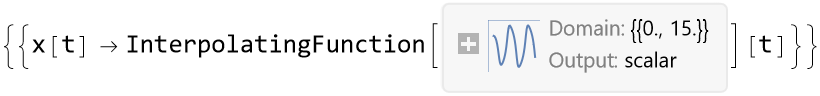
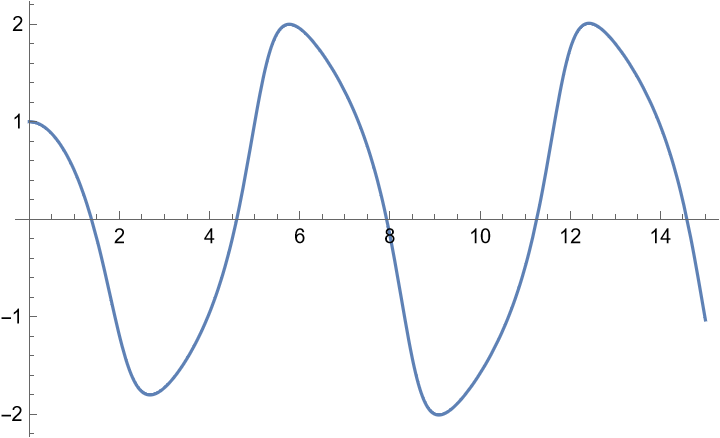

In [3]:
(*Grafiquemos la función vanderpol para un valor de m, por ejemplo mu=1*)
solnum1 = vanderpol[1]   (*Primero evaluamos la función con m=1*)
Plot[x[t]/.solnum1, {t, 0, 15}]   (*Ahora graficamos en el intervalo dado*)

In [6]:
(*Con este resultado podemos evaluar la función en cualquier punto, por ejemplo t=1*)
solnum1/.t->1

{{x[1] -> 0.497616}}

-Graphics-
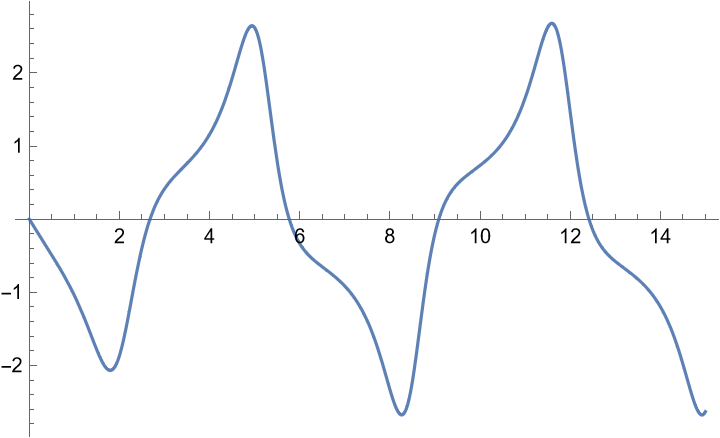

In [8]:
(*Podemos obtener la gráfica de su derivada*)
Plot[Evaluate[D[solnum1[[1, 1, 2]], t]], {t, 0, 15}]

In [10]:
solgraph[mu_] := Module[{solnum}, solnum = vanderpol[mu];
Plot[x[t]/.solnum, {t, 0, 15}, PlotLabels->mu, PlotRange -> {-3, 3}, Ticks -> {{0, 15}, {-3, 3}}, DisplayFunction -> $DisplayFunction]]

-Graphics-
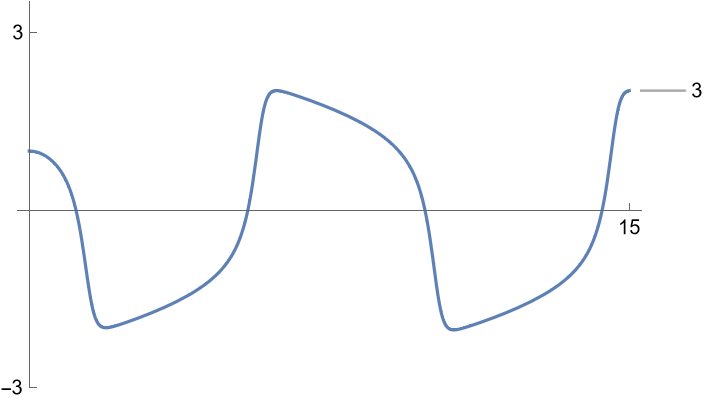

In [11]:
solgraph[3]

In [12]:
muvals = {1/16, 1/8, 1/4, 1/2, 1, 2};
graphs = Map[solgraph, muvals];
toshow = Partition[graphs, 3];

-Graphics-
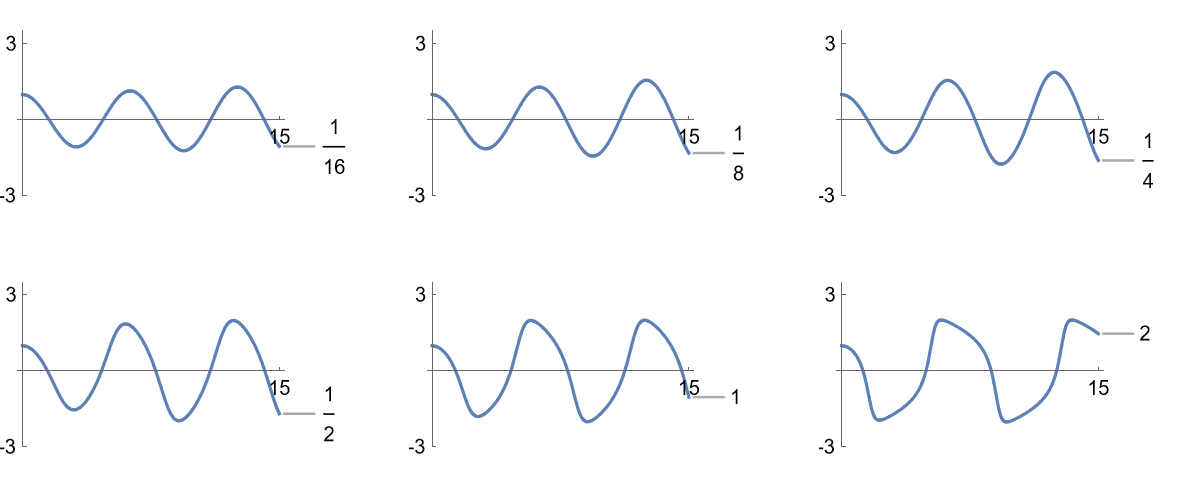

In [15]:
Show[GraphicsGrid[toshow]]

In [16]:
exactsol = DSolve[{x''[t] + x[t] == 0, x[0] == 1, x'[0] == 0}, x[t], t]

{{x[t] -> Cos[t]}}

-Graphics-
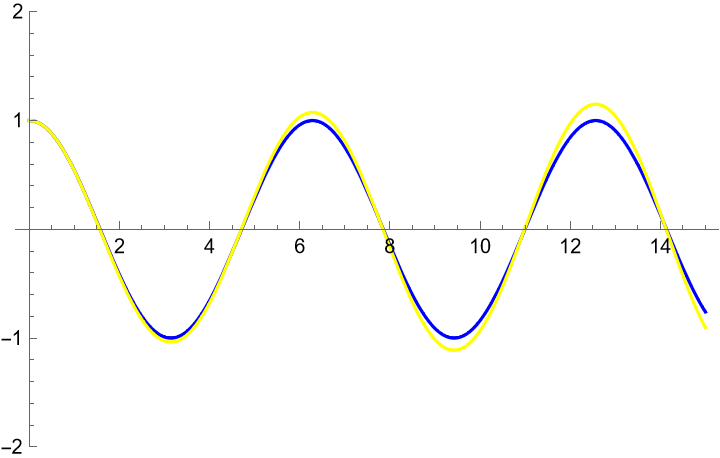

In [17]:
sol2 = vanderpol[1/32];
Plot[Evaluate[x[t]/.{exactsol, sol2}], {t, 0, 15}, PlotStyle -> {Blue, Yellow}, PlotRange -> {-2, 2}]

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i>Este ejemplo ilustra una importante diferencia entre ED lineales y no lineales.</i>
    
> Soluciones exactas para ED lineales con coeficientes constantes se pueden obtener.
    
> ED no lineales puede ser aproximadas por ED lineales.
    
</font>
</div>

#### <font color="cyan"><b>EDO lineales de orden $n$</b></font>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición</b>: <i>Una ecuación diferencial ordinaria (de orden $n$) es <b>lineal</b> si es de la forma:</i>

\begin{equation}\label{eq:eqd_l1}
	a_n(x)y^{(n)} + a_{n-1}(x)y^{(n-1)} + \cdots + a_1(x)y' + a_0(x)y + f(x) = 0 
\end{equation}

<i>donde las funciones $a_i(x),\, i = 0, 1, \dots, n$, y $f(x)$ están dados y $a_n(x)$ no es idénticamente cero.</i>
    
</font>
</div>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
* <i>Si $f(x) = 0$, la ecuación (\ref{eq:eqd_l1}) es llamada <b>homogénea</b>.</i>
    
    
* <i>Si $f(x) \neq 0$, la ecuación (\ref{eq:eqd_l1}) es llamada <b>no homogénea</b>.</i>
    
    
* <i>Si las funciones $a_i(x),\, i = 0, 1, \dots, n$ son constantes, la ecuación (\ref{eq:eqd_l1}) es llamada <b>EDO lineal con coeficientes constantes</b>.</i>
 
</font>
</div>

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Teorema (Existencia y Unicidad)</b>: <i>Si las funciones $a_n(x), a_{n-1}(x), \dots, a_1(x), a_0(x)$ y $f(x)$ son continuas en un intervalo $I$ y $a_n(x) \neq 0$ para toda $x$ en el intervalo $I$, entonces para cada $x_0 \in I$ hay una única solución del problema con valores iniciales en $I$</i>

\begin{equation}
	\left\{a_n(x)y^{(n)} + a_{n-1}(x)y^{(n-1)} + \cdots + a_1(x)y' + a_0(x)y + f(x) = 0 \atop
	y(x_0) = y_0, \,\ y'(x_0) = y'_0, \,\ y''(x_0) = y''_0, \,\dots, \,\ y^{(n-1)}(x_0) = y^{(n-1)}_0
	\right.
\end{equation}

<i>donde $y_0, y'_0, y''_0, \dots, y^{(n-1)}_0$ representan constantes arbitrarias</i>
    
</font>
</div>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i>El teorema no se puede aplicar a un problema con condiciones de frontera</i>
    
</font>
</div>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición (Dependencia Lineal y Funciones Linealmente Independientes)</b>: <i>Sea $S = \{f_1(x), f_2(x), \dots, f_n(x)\}$ un conjunto de funciones. $S$ es <b>linealmente dependiente</b> en un intervalo $I$ si hay constantes $c_1, c_2, \dots, c_n,$ no todas cero, tal que</i>

\begin{equation*}
	c_1 f_1(x) + c_2 f_2(x) + \cdots + c_n f_n(x) = 0
\end{equation*}

<i>para cualquier valor de $x$ en el intervalo $I$. $S$ es <b>linealmente independiente</b> si $S$ no es linealmente dependiente.</i>
    
</font>
</div>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición (Wronskiano)</b>: <i>Sea $S = \{f_1(x), f_2(x), \dots, f_n(x)\}$ un conjunto de $n$ funciones donde cada una es diferenciable al menos $n-1$ veces. El <b>Wronskiano</b> de $S$, esta dado por</i>
    
\begin{equation*}
    W(S) = W(\{f_1(x), f_2(x), \dots, f_n(x)\}) =
    \begin{vmatrix}
    f_1(x) & f_2(x) & \cdots & f_n(x) \\
    f'_1(x) & f'_2(x) & \cdots & f'_n(x) \\
    \vdots & \vdots & \vdots & \vdots \\
    f^{(n-1)}_1(x) & f^{(n-1)}_2(x) & \cdots & f^{(n-1)}_n(x) \\
    \end{vmatrix}
\end{equation*}
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Cálcule el Wronskiano de los siguientes conjuntos de funciones: (a) $S = \{\sin(x), \cos(x)\}$ y (b) $S = \{\cos(2x), \sin(2x), \sin(x)\cos(x)\}$</i>
    
<b>Solución</b>: <i>Primero obtendremos el Wronskiano del conjunto de funciones del inciso (a): $S = \{\sin(x), \cos(x)\}$</i>
    
\begin{equation*}
    W(S) =
    \begin{vmatrix}
        \sin(x) & \cos(x) \\
        \cos(x) & -\sin(x) \\
    \end{vmatrix}
    = -\sin^2(x) -\cos^2(x) = -1 
\end{equation*}
    
<i>Para el inciso (b): $S = \{\cos(2x), \sin(2x), \sin(x)\cos(x)\}$, realizaremos el cálculo con Wolfram Langauge</i>
    
</font>
</div>

In [19]:
Wronskian[{Sin[2*x], Cos[2*x], Sin[x]*Cos[x]}, x]

0

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>:

> <i>En el ejemplo anterior vemos que en el inciso (a) el Wronskiano no es $0$, mientras que en el inciso (b) es $0$</i>

> <i>Ademas el conjunto de funciones del inciso (a) es linealmente independiente, mientras que el conjunto de funciones del inciso (b) es linealmente dependiente</i>

> <i>Veremos que podemos utilizar el Wronskiano para determinar si un conjunto de funciones es linealmente dependiente o linealmente independiente .</i>
    
</font>
</div>

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Teorema</b>: <i>Sea $S = \{f_1(x), f_2(x), \dots, f_n(x)\}$ un conjunto de $n$ soluciones de la ecuación (\ref{eq:eqd_l1}), una EDO lineal de orden $n$, en un intervalo $I$. $S$ es linealmente independiente si y solo si $W(S) \neq 0$ para almenos un valor de $x$ en el intervalo $I$.</i>
        
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Utilice el Wronskiano para clasificar el siguiente conjunto de funciones como linealmente independientes o linealmente dependientes: (a) $S = \{1 - 2\sin^2(x), \cos(2x)\}$ y (b) $S = \{e^x, x e^x, x^2 e^x\}$</i>

<b>Solución</b>: <i>(a) Note que el conjunto de funciones $S$ son soluciones de $y'' + 4 y = 0$. Calculemos entonces el Wronskiano de estas funciones</i>

\begin{equation*}
	W(S) =
	\begin{vmatrix}
		1 - 2\sin^2(x) & \cos(2x) \\
		-4\sin(x)\cos(x) & -2\sin(2x) \\
	\end{vmatrix}
	= -2\sin(2x)[1 - 2\sin^2(x)] + 4\sin(x)\cos(x)\cos(2x) \\ = 0 
\end{equation*}

<i>Para el inciso (b), observe que las funciones del conjunto $S$ son soluciones de $y''' - 3y'' + 3y' - y=0$. Aquí utilizaremos Wolfram para obtener el Wronskiano.</i>
    
</font>
</div>

In [20]:
Wronskian[{Exp[x], x Exp[x], x^2 Exp[x]}, x]

3 x
2 E

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<i>Concluimos que el conjunto de funciones del inciso (a) son linealmente dependientes, mientras que las del inciso (b) son linealmente independientes.</i>
    
</font>
</div>

#### <font color="cyan"><b>Conjunto fundamental de soluciones</b></font>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición (Conjunto Fundamental de Soluciones)</b>: <i>Un conjunto $S$ de $n$ soluciones no triviales linealmente independientes de una EDO de orden $n$, lineal y homogénea es llamado <b>conjunto fundamental de soluciones</b> de la ecuación.</i>
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Probar que $S = \{e^{-5x}, e^{-x}\}$ es un conjunto fundamental de soluciones de la ecuación $y'' + 6y' + 5y = 0$</i>

<b>Solución</b>: <i>Dado que</i>

\begin{equation*}
	\frac{d^2 e^{-5x}}{dx^2} + 6 \frac{d e^{-5x}}{dx} + 5 e^{-5x} = 25 e^{-5x} - 30 e^{-5x} + 5 e^{-5x} = 0
\end{equation*}
y
\begin{equation*}
	\frac{d^2 e^{-x}}{dx^2} + 6 \frac{d e^{-x}}{dx} + 5 e^{-x} = e^{-x} - 6 e^{-x} + 5 e^{-x} = 0
\end{equation*}

<i>entonces, cada función es una solución de la ecuación diferencial.</i>
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<i>Ademas $S$ es linealmente independiente porque:</i>
    
</font>
</div>

In [21]:
Wronskian[{Exp[-5 x], Exp[-x]}, x]

4
----
 6 x
E

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Teorema (Principio de Superposición)</b>: <i>Si $S = \{f_1(x), f_2(x), \dots, f_k(x)\}$ es un conjunto de soluciones de la EDO de orden $n$, lineal y homogénea y $\{c_1, c_2, \dots, c_k\}$ es un conjunto de $k$ constantes, entonces</i>

\begin{equation*}
	f(x) = c_1 f_1(x) + c_2 f_2(x) + \cdots + c_k f_k(x)
\end{equation*}

<i>es también una solución de la ecuación. $f(x)$ es llamada <b>combinación lineal de funciones</b> el conjunto $S$.<i/>
    
</font>
</div>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición (Solución General)</b>: <i>Si $S = \{y_1(x), y_2(x), \dots, y_n(x)\}$ es un conjunto fundamental de soluciones de la EDO de orden $n$, lineal y homogénea </i>

\begin{equation}\label{eq:edo_lh}
	a_n(x)y^{(n)} + a_{n-1}(x)y^{(n-1)} + \cdots + a_1(x)y' + a_0(x)y = 0
\end{equation}

<i>entonces la solución general de la ecuación es<i/>

\begin{equation*}
	f(x) = c_1 y_1(x) + c_2 y_2(x) + \cdots + c_n y_n(x)
\end{equation*}

<i>donde $\{c_1, c_2, \dots, c_n\}$ es un conjunto de $n$ constantes arbitrarias.<i/>
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<i>Continuando con el ejemplo anterior, ya probamos que $S = \{e^{-5x}, e^{-x}\}$ es un conjunto fundamental de soluciones de la ecuación $y'' + 6y' + 5y = 0$. Entonces por el teorema de solución general, tenemos que:</i>

\begin{equation*}
	f(x) = c_1 e^{-5x} + c_2 e^{-x}
\end{equation*}

<i>es la solución general de la ecuación $y'' + 6y' + 5y = 0$, en efecto:</i>

\begin{eqnarray*}
	\frac{d^2 f(x)}{dx^2} + 6 \frac{d f(x)}{dx} + 5 f(x)
	&=& \frac{d^2 (c_1 e^{-5x} + c_2 e^{-x})}{dx^2} + 6 \frac{d (c_1 e^{-5x} + c_2 e^{-x})}{dx} + 5 (c_1 e^{-5x} + c_2 e^{-x}) \\
	&=& 25c_1 e^{-5x} + c_2 e^{-x} - 30c_1 e^{-5x} - 6c_2 e^{-x} + 5c_1 e^{-5x} + 5c_2 e^{-x} \\
	&=& c_1\big(25 e^{-5x} - 30 e^{-5x} + 5 e^{-5x} \big) + c_2\big( e^{-x} - 6 e^{-x} + 5 e^{-x} \big) = 0
\end{eqnarray*}
    
</font>
</div>

#### <font color="cyan"><b>Existencia de un conjunto fundamental de soluciones</b></font>

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Teorema</b>: <i>Si $a_i(x)$ es continua en un intervalo abierto $I$ para $i = 0, 1, \dots, n$, y $a_n(x) \neq 0$ para todo $x$ en el intervalo $I$ entonces la EDO de orden $n$, lineal y homogénea (\ref{eq:edo_lh})</i>

\begin{equation*}
	a_n(x)y^{(n)} + a_{n-1}(x)y^{(n-1)} + \cdots + a_1(x)y' + a_0(x)y = 0
\end{equation*}

<i>tiene un conjunto fundamental de $n$ soluciones.<i/>
        
</font>
</div>

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Teorema</b>: <i>Cualquier conjunto de $n+1$ soluciones de una EDO de orden $n$, lineal y homogénea (\ref{eq:edo_lh}) es linealmente dependiente.</i>
        
</font>
</div>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i>El resultado de estos dos teoremas se puede resumir dciendo que para resolvera EDO de orden $n$, lineal y homogénea, debemos encontrar un conjunto $S$ de $n$ funciones que satisfacen la ecuación diferencial (\ref{eq:edo_lh}), tal que $W(S) \neq 0$.</i>
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Probar que $y = e^{-x}(c_1 \cos(4x) + c_2\sin(4x))$ es una solución general de $y'' + 2y' + 17y = 0$.</i>

<b>Solución</b>: <i>Utilizaremos Wolfram Language para probar lo que se pide, primero utilizaremos el comando DSolve para obtener la solución de la ED, después obtendremos el Wronskiano de $\cos(4x), \sin(4x)$ y veremos que en efecto es diferente de cero.</i>
    
</font>
</div>

C[2] Cos[4 x]   C[1] Sin[4 x]
{{y[x] -> ------------- + -------------}}
                x               x
               E               E
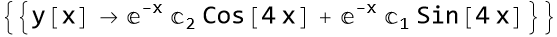

In [22]:
DSolve[y''[x] + 2 y'[x] + 17 y[x] == 0, y[x], x]

In [23]:
Wronskian[{Cos[4 x], Sin[4 x]}, x]

4

#### <font color="cyan"><b>Reducción de orden</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i>En ciertas ocasiones, podemos reducir una ecuación de segundo orden mediante una apropiada sustitución a una de primer orden. Considere la ecuación</i>

\begin{equation*}
	y'' + p(x)y' + q(x)y = 0
\end{equation*}

<i>y suponga que $y_1 = f(x)$ es una solución de esta ecuación. De los temas vistos anteriormente, sabemos que esta ecuación tiene dos solucione linealmente independientes. Entonces, vamos a determinar una segunda solución linealmente independiente, proponemos una solución de la siguiente forma</i>

\begin{equation*}
	y_2 = \nu(x)f(x)
\end{equation*}

<i>donde $\nu(x)$ no es una función constante. Diferenciamos la función $y_2$ dos veces, obtenemos</i>

\begin{equation*}
	y'_2 = \nu'(x)f(x) + \nu(x)f'(x) \quad\text{y}\quad\ y''_2 = \nu''(x)f(x) + 2\nu'(x)f'(x) + \nu(x)f''(x).
\end{equation*}

</font>
</div>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<i>Sustituyendo en la ecuación diferencial, tenemos</i>

\begin{eqnarray*}
	y'' + p(x)y' + q(x)y &=& \nu''f + 2\nu'f' + \nu f'' + p(x)\big(\nu'f + \nu f'\big) + q(x)\nu f \\
	&=& f\nu'' + \big(2f' + p(x)f\big)\nu' + \nu\big(f'' + p(x)f' + q(x)f\big) \\
	&=& f\nu'' + \big(2f' + p(x)f\big)\nu' = 0
\end{eqnarray*}

<i>Observe que la ecuación final resultante se puede reducir a una EDO de primer orden mediante el cambio de variable $\omega = \nu'$, es decir, finalmente obtenemos</i>

\begin{equation*}
	f\omega' + \big(2f' + p(x)f\big)\omega = 0
\end{equation*}

<i>La cual resulta ser una ecuación de variables separables</i>

\begin{equation*}
	\frac{1}{\omega}d\omega = \left(-2\frac{f'}{f} - p(x)\right)dx \quad\Rightarrow\quad\ \omega = \frac{1}{f^2}e^{-\int p(x)dx}
\end{equation*}

<i>Recordando que $\omega = \nu'$ y $y_1(x) = f(x)$, obtenemos</i>

\begin{equation*}
	\nu(x) = \int \frac{1}{\big[y_1(x)\big]^2}e^{-\int p(x)dx} dx \quad\Rightarrow\quad\ y_2(x) = y_1(x)\int \frac{1}{\big[y_1(x)\big]^2}e^{-\int p(x)dx} dx
\end{equation*}
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Determine una segunda solución linealmente independiente para la ecuación $4x^2 y'' + 8xy' + y = 0,\,\ x > 0$, dado que $y_1(x) = \frac{1}{\sqrt{x}}$ es una solución</i>

<b>Solución</b>: <i>Primero dividimos la ecuación entre $4x^2$ para obtener una ecuación de la forma $y'' + p(x)y' + q(x)y = 0$. Esto nos lleva a la ecuación</i>

\begin{equation*}
	y'' + \frac{2}{x}y' + \frac{1}{x^2}y = 0
\end{equation*}

<i>Observamos que para esta ecuación tenemos: $p(x) = \frac{2}{x}$ y $y_1(x) = x^{-1/2}$. Aplicando las formulas obtenidas anteriormente para $\nu$ y $y_2$ se tiene</i>

\begin{equation*}
	\nu(x) = \int \frac{1}{\big[y_1(x)\big]^2}e^{-\int p(x)dx} dx = \int \frac{1}{\big[x^{-1/2}\big]^2}e^{-\int \frac{2}{x}dx} dx = \int x e^{-2 \ln(x)}dx = \int \frac{1}{x}dx = \ln(x)
\end{equation*}
<i>y</i>
\begin{equation*}
	y_2(x) = \nu(x)y_1(x) = \ln(x)x^{-1/2} = \frac{\ln(x)}{\sqrt{x}}
\end{equation*}
    
</font>
</div>

### <font color="gren"><b>EDO homogéneas con coeficientes constantes</b></font>

#### <font color="cyan"><b>Ecuaciones de segundo orden</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<i>Suponga que los coeficientes de la ecuación $a_2(t)y''+ a_1(t)y' + a_0(t)y = f(t)$ son constantes: $a_2(t) = a, a_1(t) = b \text{ y } a_0(t) = c$ y suponga ademas que $f(t) = 0$. En este caso, se tiene la ecuación</i>

\begin{equation}\label{eq:edo2_lnc}
	ay''+ by' + cy = 0.
\end{equation}

<i>Ahora suponemos que $y = e^{kt}$, $k = cte$, es una solución de la ecuación (\ref{eq:edo2_lnc}). Entonces, $y' = ke^{kt}$ y $y'' = k^2e^{kt}$, sustituyendo esto en la ecuación (\ref{eq:edo2_lnc}) se tiene</i>

\begin{equation*}
	ay'' + by' + cy =  ak^2e^{kt} + bke^{kt} + ce^{kt} = e^{kt}\big(ak^2 + bk + c\big) = 0.
\end{equation*}

<i>Debido a que $e^{kt} \neq 0$, entonces la solución de la ecuación (\ref{eq:edo2_lnc}) esta determinada por la solución de</i>

\begin{equation}\label{eq:ec}
	ak^2 + bk + c = 0.
\end{equation}

<i>llamada <b>ecuación característica</b> de l ecuación (\ref{eq:edo2_lnc})</i>
    
</font>
</div>

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Teorema</b>: <i>Sea $k_1$ y $k_2$ las soluciones de la ecuación característica (\ref{eq:edo2_lcc}).</i>

> <i>Si $k_1 \neq k_2$ y son reales, las dos soluciones linealmente independientes de la ecuación (\ref{eq:edo2_lcc}) son: $y_1 = e^{k_1 t}$ y $y_2 = e^{k_2 t}$, por lo que la solución general de la ecuación (\ref{eq:edo2_lcc}) es</i>

\begin{equation*}
	y = c_1 e^{k_1 t} + c_2 e^{k_2 t}
\end{equation*}

> <i>Si $k_1 = k_2 = k$ las dos soluciones linealmente independientes de la ecuación (\ref{eq:edo2_lcc}) son: $y_1 = e^{k t}$ y $y_2 = te^{k t}$, por lo que la solución general de la ecuación (\ref{eq:edo2_lcc}) es</i>

\begin{equation*}
	y = c_1 e^{k t} + c_2 te^{k t}
\end{equation*}

> <i>Si $k_{1,2} = \alpha \pm \beta i$ las dos soluciones linealmente independientes de la ecuación (\ref{eq:edo2_lcc}) son: $y_1 = e^{\alpha t}\cos(\beta t)$ y $y_2 = e^{\alpha t}\sin(\beta t)$, por lo que la solución general de la ecuación (\ref{eq:edo2_lcc}) es</i>

\begin{equation*}
	y = e^{\alpha t}\big(c_1 \cos(\beta t) + c_2 \sin(\beta t)\big)
\end{equation*}
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Resuelva las siguientes ecuaciones: a) $6y'' + y' -2y = 0$; b) $y'' + 2y' + y = 0$; c) $16y'' + 8y' +145y = 0$</i>
    
<b>Solución</b>: <i>Las ecuaiones características de cada ecuación son: a) $6k^2 + k -2 = (3k + 2)(2k - 1) = 0$; b) $k^2 + 2k + 1 = (k + 1)^2 = 0$; y c) $16k^2 + 8k +145 = 0$. Las raices de estas ecuaciones son: a) $k_1 = -\frac{2}{3}$ y $k_2 = \frac{1}{2}$; b) $k = -1$; y c) $k_{1,2} = -\frac{1}{4} \pm 3i$</i>. Por lo que las soluciones generales de dichas ecuaciones son:
    
\begin{eqnarray*}
    & a)& y = c_1 e^{-2t/3} + c_2 e^{t/2} \\
    & b)& y = c_1 e^{-t} + c_2 te^{-t} \\
    & c)& y = e^{-t/4}\big(c_1 \cos(3t) + c_2 \sin(3t)\big)
\end{eqnarray*}
    
<i>Comprobaremos los resultados con Wolfram Language</i>
    
</font>
</div>

C[1]      t/2
{{y[t] -> -------- + E    C[2]}}
           (2 t)/3
          E
          C[1]   t C[2]
{{y[t] -> ---- + ------}}
            t       t
           E       E
          C[2] Cos[3 t] + C[1] Sin[3 t]
{{y[t] -> -----------------------------}}
                       t/4
                      E
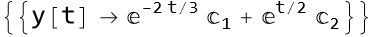
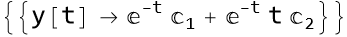
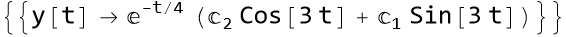

In [1]:
DSolve[6 y''[t] + y'[t] - 2 y[t] == 0, y[t], t]
DSolve[y''[t] + 2 y'[t] + y[t] == 0, y[t], t]
DSolve[16 y''[t] + 8 y'[t] + 145 y[t] == 0, y[t], t]//Simplify

#### <font color="cyan"><b>Ecuaciones de orden superior</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i>Al igual que las ecuaciones de segundo orden, las soluciones para cualquier EDO lineal y homogénea de orden $n$ con coeficientes constantes, esta determinada por la solución de la <b>ecuación característica</b>, se obtiene suponiendo que $y = e^{kt}$</i>
    
</font>
</div>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición (Ecuación Característica)</b>: <i>La ecuación</i>

\begin{equation}\label{eq:ec_n}
	a_n k^n + a_{n-1}k^{n-1} + \cdots + a_2 k^2  +a_1 k + a_0 = 0
\end{equation}

<i>es llamada <b>ecuación característica</b> de la EDO lineal y homogénea de orden $n$ con coeficientes constantes</i>

\begin{equation*}
	a_n y^{(n)} + a_{n-1}y^{(n-1)} + \cdots + a_2 y''  +a_1 y' + a_0 y = 0
\end{equation*}

</font>
</div>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición (Multiplicidad)</b>: <i>Suponga que la ecuación característica $a_n k^n + a_{n-1}k^{n-1} + \cdots + a_2 k^2  +a_1 k + a_0 = 0$ puede escribirse en forma factorizada como $(k - k_1)^{m_1} (k - k_2)^{m_2} \cdots (k - k_r)^{m_r}$, donde $k_i \neq k_j$ (para $i \neq j$), y $m_1 + m_2 + \cdots + m_r = n$. Entonces las raíces de la ecuación característica son $k = k_1,\, k = k_2,\, \dots, \text{ y } k = k_r$ donde las raíces tienen <b>multiplicidad</b> $m_1,\, m_2,\, \dots, \text{ y } m_r$, respectivamente</i>
    
</font>
</div>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i>Una solución general de una EDO lineal y homogénea de orden $n$ ecuación con coeficientes reales constantes está determinada por las soluciones de su ecuación característica. Por lo tanto, establecemos las siguientes reglas para encontrar una solución general.</i>
    
* <i>Si una solución $k$ de la ecuación (\ref{eq:ec_n}) tiene multiplicidad $m$, las $m$ soluciones linealmente independientes correspondientes a $k$ son</i>
    
\begin{equation*}
	e^{kt},\, te^{kt},\, \dots,\, t^{m-1}e^{kt}
\end{equation*}
    
* <i>Si una solución $k = \alpha + \beta i$, $\beta \neq 0$, de la ecuación (\ref{eq:ec_n}) tiene multiplicidad $m$, las $2m$ soluciones linealmente independientes correspondientes a $k = \alpha \pm \beta i$ son</i>
    
\begin{equation*}
	e^{\alpha t}\cos(\beta t),\, e^{\alpha t}\sin(\beta t),\, te^{\alpha t}\cos(\beta t),\, te^{\alpha t}\sin(\beta t),\, \dots,\, t^{m-1}e^{\alpha t}\cos(\beta t),\, t^{m-1}e^{\alpha t}\sin(\beta t)
\end{equation*}
    
<i>Observe que la clave del proceso es identificar cada raíz de la ecuación característica y la solución asociada.</i>
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Resuleva la ecuación $12y''' - 5y'' - 6y' - y = 0$.</i>
    
<b>Solución</b>: <i>La ecuación característica es $12k^3 - 5k^2 - 6k - 1 = (k - 1)(3k + 1)(4k + 1) = 0$, la cual tiene como soluciones: $k_1 = -1/3,\, k_2 = -1/4 \text{ y } k_3 = 1$. Así que, la solución general de esta ecuación es:</i>
    
\begin{equation*}
    y = c_1 e^{-t/3} + c_2 e^{-t/4} + c_3 e^t
\end{equation*}
    
<i>Podemos comorobarlo con Wolfram Language</i>
    
</font>
</div>

(-1 + k) (1 + 3 k) (1 + 4 k)
         1            1
{{k -> -(-)}, {k -> -(-)}, {k -> 1}}
         3            4
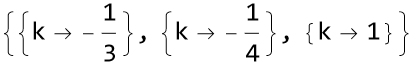

In [5]:
(*Primero comprobemos que en efecto la ecuación característica se puede factorizar de esa manera*)
Factor[12k^3 - 5k^2 - 6k - 1]
Solve[12k^3 - 5k^2 - 6k - 1 == 0]

C[1]   C[2]    t
{{y[t] -> ---- + ---- + E  C[3]}}
           t/4    t/3
          E      E
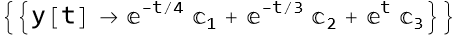

In [8]:
(*Ahora veamos la solución de la ecuación diferencial*)
DSolve[12 y'''[t] - 5 y''[t] - 6 y'[t] - y[t] == 0, y[t], t]

### <font color="gren"><b>EDO no homogéneas con coeficientes constantes</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i>Para resolver una ecuación lineal no homogénea</i>

\begin{equation}\label{eq:edo_lnh}
	a_n y^{(n)} + a_{n-1}y^{(n-1)} + \cdots + a_2 y''  +a_1 y' + a_0 y = f(x),
\end{equation}

<i>se debe hacer lo siguiente:</i>

* <i>encontrar la solución de la EDO homogénea asociada ($f(x) = 0$), $y_h$</i>

* <i>y encontrar una solución particular $y_p$ de la ecuación no homogénea (\ref{eq:edo_lnh})</i>
    
</font>
</div>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición (Solución Particular)</b>: <i>Una solución particular, $y_p(x)$, de la ecuación diferencial (\ref{eq:edo_lnh}), es una función que no contiene constantes arbitrarias y satisface la ecuación (\ref{eq:edo_lnh}).</i>
    
</font>
</div>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición (Solución General de una Ecuación no Homogénea)</b>: <i>Una solución general de la ecuación diferencial (\ref{eq:edo_lnh})</i>
    
\begin{equation*}
	a_n y^{(n)} + a_{n-1}y^{(n-1)} + \cdots + a_2 y''  +a_1 y' + a_0 y = f(x),
\end{equation*}
    
<i>es</i>
    
\begin{equation*}
	y = y_h + y_p
\end{equation*}
    
<i>donde $y_h$ es la solución de la ecuación homogénea correspondiente</i>
    
\begin{equation*}
	a_n y^{(n)} + a_{n-1}y^{(n-1)} + \cdots + a_2 y''  +a_1 y' + a_0 y = 0
\end{equation*}
    
<i>y $y_p$ es una solución particular de la ecuación no homogénea.</i>
    
</font>
</div>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i>La pregunta es ¿Como obtener la solución particular?</i>
    
<i>Método de Coeficientes Indeterminados</i>
    
<i>Método de Variación de parametross</i>
    
</font>
</div>

#### <font color="cyan"><b>Metodo de Coeficientes Indeterminados</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Esquema del Método de Coeficientes Indeterminados</b>
    
> <i>Obtener la solución de la ecuación homogénea correspondiente, $y_h(x)$.</i>
    
> <i><font color="blue">Determine la forma de la solución particular $y_p(x)$.</font></i>
    
> <i>Determinar los coeficientes desconocidos en $y_p(x)$, sustituyendo $y_p(x)$ en la ecuación no homogénea e igualando los coeficientes de términos semejantes.</i>
    
> <i>La forma de la solución general es $y(x) = y_h(x) + y_p(x)$.</i>
    
</font>
</div>

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Determinado la forma de $y_p(x)$</b>
    
<i>Suponga que $f(x) = b_1 f_1(x) + b_2 f_2(x) + \cdots + b_j f_j(x)$, donde $b_1,\, b_2,\, \dots,\, b_j$ son constantes y cada $f_i(x),\, i = 1,\, 2,\, \dots, \,j$, es una función de la forma $x^m,\, x^m e^{kx},\, x^m e^{\alpha x}\cos(\beta x),\text{ o } x^m e^{\alpha x}\sin(\beta x)$</i>.
    
> <i>Si $f_i(x) = x^m$ el conjunto de funciones asociada es</i>
\begin{equation*}
    S = \{1,\, x,\, x^2,\, \dots, x^m\}
\end{equation*}
    
> <i>Si $f_i(x) = x^m e^{kx}$ el conjunto de funciones asociada es</i>
\begin{equation*}
    S = \{e^{kx},\, x e^{kx},\, x^2 e^{kx},\, \dots, x^m e^{kx}\}
\end{equation*}
    
> <i>Si $f_i(x) = x^m e^{\alpha x}\cos(\beta x),\text{ o } x^m e^{\alpha x}\sin(\beta x)$ el conjunto de funciones asociada es</i>
\begin{equation*}
    S = \{e^{\alpha x}\cos(\beta x),\, x e^{\alpha x}\cos(\beta x),\, x^2 e^{\alpha x}\cos(\beta x),\, \dots, x^m e^{\alpha x}\cos(\beta x),\\
    e^{\alpha x}\sin(\beta x),\, x e^{\alpha x}\sin(\beta x),\, x^2 e^{\alpha x}\sin(\beta x),\, \dots, x^m e^{\alpha x}\sin(\beta x)\}
\end{equation*}
    
<i>Para cada función $f_i(x)$ en $f(x)$, se determina el conjunto asociado de funciones $S$. Si alguna de las funciones en $S$ aparece en la solución general de la correspondiente ecuación homogénea, $y_h(x)$, multiplique cada función en $S$ por $x^r$ para obtener un nuevo conjunto $xrS$, donde $r$ es el entero positivo más pequeño para que cada función en $x^rS$ no sea una solución de la ecuación homogénea correspondiente. De esta manera se obtiene una solución particular tomando la combinación lineal de todas las funciones en los conjuntos asociados, estas funciones deben aparecer solo una vez en la solución particular.</i>
    
</font>
</div>

##### <font color="orange"><b>Ecuaciones de segundo orden</b></font>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Resuelva la ecuación no homogénea (a) $y'' + 5y' + 6y = 2e^x$ y (b) $y'' + 5y' + 6y = 3e^{-2x}$.</i>

<b>Solución (a)</b>: <i>La ecuación homogénea correspondiente es  $y'' + 5y' + 6y = 0$ cuya ecuación característica es $k^2 + 5k + 6 = (k + 2)(k + 3) = 0$, entonces $k_1 = -2$ y $k_2 = -3$. Por lo tanto la solución general de la ecuación homogénea es:</i>

\begin{equation*}
	y_h(x) = c_1 e^{-2x} + c_2 e^{-3x}.
\end{equation*}

<i>Ahora determinemos la forma de la solución particular, $y_p(x)$. Escojamos $S = \{e^x\}$ porque $f(x) = 2e^x$. Observe que $e^x$ no es una solución de la ecuación homogénea, así que tomamos a $y_p(x)$ como una combinación lineal de $S$, es decir</i>

\begin{equation*}
	y_p(x) = Ae^x.
\end{equation*}

<i>Sustituimos esta solución en la ecuación no homogénea, $y'' + 5y' + 6y = 2e^x$ , entonces tenemos</i>

\begin{equation*}
	Ae^x + 5Ae^x + 6Ae^x = 2e^x\\
	12Ae^x = 2e^x\\
	12A = 2.
\end{equation*}

<i>Por lo tanto $A = \frac{1}{6}$, así que</i>

\begin{equation*}
	y_p(x) = \frac{1}{6}e^x,
\end{equation*}

<i>y la solución general de la ecuación no homogénea es</i>

\begin{equation*}
	y(x) = y_h(x) + y_p(x) = c_1 e^{-2x} + c_2 e^{-3x} + \frac{1}{6}e^x.
\end{equation*}

<i>El inciso (b) se deja como ejercicio.</i>
    
</font>
</div>

> Comprobemos el resultado con <i>Wolfram Language</i>. 

In [10]:
(*Primero los factores y las raices*)
Factor[k^2 + 5 k + 6]
Solve[k^2 + 5 k + 6 == 0, k]

(2 + k) (3 + k)
{{k -> -3}, {k -> -2}}

C[1]   C[2]
{{y[x] -> ---- + ----}}
           3 x    2 x
          E      E
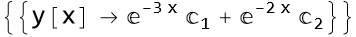

In [13]:
(*Comprobemos la solución de la homogénea*)
DSolve[y''[x] + 5 y'[x] + 6 y[x] == 0, y[x], x]

x     x
6 a E  == E
       1
{{a -> -}}
       6
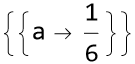

In [17]:
(*Ahora sustituimos la solución particular en la ecuación no homogénea*)
(*y obtenemos el valor de la constante*)
yp[x_] := a Exp[x]
sust = Simplify[yp''[x] + 5 yp'[x] + 6 yp[x] == 2 Exp[x]]
Solve[sust, a]

x
          E    C[1]   C[2]
{{y[x] -> -- + ---- + ----}}
          6     3 x    2 x
               E      E
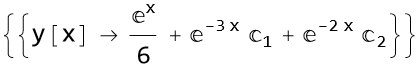

In [20]:
(*Por ultimo comprobamos la solucion general de la ecuación no homogpenea*)
DSolve[y''[x] + 5 y'[x] + 6 y[x] == 2 Exp[x], y[x], x]

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Resuelva la ecuación no homogénea (a) $y'' + 4y = \cos(2t),\, y(0) = 0,\, y'(0) = 0$ y (b) $4y'' + 4y' + 37y = \cos(3x),\, y(0) = y(\pi)$ (compruebe que este problema con valor de forntera tiene infinitas soluciones).</i>

<b>Solución (a)</b>: <i>La ecuación homogénea correspondiente es  $y'' + 4y = 0$ cuya ecuación característica es $k^2 + 4 =  0$, la cual tiene como raices $k_1 = 2i$ y $k_2 = -2i$. Por lo tanto la solución general de la ecuación homogénea es:</i>

\begin{equation*}
	y_h(t) = c_1 \cos(2t) + c_2 \sin(2t).
\end{equation*}

<i>Ahora determinemos la forma de la solución particular, $y_p(x)$. Para este ecuación, $S = \{\cos(2t),\, \sin(2t)\}$, observe que estas funciones forman parte de la solución de la ecuación homogénea correspondiente, así que, multiplicamos el conjunto $S$ por $t$ y obtenemos $tS = \{t\cos(2t),\, t\sin(2t)\}$. Entonces, asumimos una solucíon particular de la forma</i>

\begin{equation*}
	y_p(t) = At\cos(2t) + Bt\sin(2t).
\end{equation*}

<i>Sustituimos esta solución en la ecuación no homogénea, $y'' + 4y = \cos(2t)$ , entonces tenemos</i>

\begin{equation*}
	-4A\sin(2t) - 4At\cos(2t) + 4B\cos(2t) - 4Bt\sin(2t)\\
    + 4At\cos(2t) + 4Bt\sin(2t) = \cos(2t)\\
	4B\cos(2t) - 4A\sin(2t) = \cos(2t)
\end{equation*}

<i>Igualando coeficientes tenemos que $A = 0$ y $B = \frac{1}{4}$, así que una solución particular seria$</i>

\begin{equation*}
	y_p(t) = \frac{1}{4}t\sin(2t),
\end{equation*}

<i>y la solución general de la ecuación no homogénea es</i>

\begin{equation*}
	y(t) = y_h(t) + y_p(t) = c_1 \cos(2t) + c_2 \sin(2t) + \frac{1}{4}t\sin(2t).
\end{equation*}

<i>Ahora apliquemos las condiciones iniciales $y(0) = 0$ y $y'(0) = 0$</i>

\begin{equation*}
	y(0) = c_1 \cos(0) + c_2 \sin(0) + \frac{1}{4}(0)\sin(0) = c_1\\
    y'(0) = -2c_1 \sin(0) + 2c_2 \cos(0) + \frac{1}{2}(0)\cos(0) + \frac{1}{4}\sin(0) = 2c_2
\end{equation*}

<i>por lo que $c_1 = 0$ y $c_2 = 0$ y la solucion para este problema con valores iniciales es:</i>

\begin{equation*}
	y(t) = \frac{1}{4}t\sin(2t).
\end{equation*}

<i>El inciso (b) se deja como ejercicio.</i>
    
</font>
</div>

> Comprobemos el resultado con <i>Wolfram Language</i>. 

In [23]:
Clear[k]
(*Primero los factores y las raices*)
Factor[k^2 + 4]
Solve[k^2 + 4 == 0, k]

2
4 + k
{{k -> -2 I}, {k -> 2 I}}

In [27]:
Clear[y]
(*Comprobemos la solución de la homogénea*)
solhom = DSolveValue[y''[t] + 4 y[t] == 0, y[t], t]

C[1] Cos[2 t] + C[2] Sin[2 t]

In [32]:
Clear[A, B]
(*Ahora sustituimos la solución particular en la ecuación no homogénea*)
(*y obtenemos el valor de la constante*)
yp[t_] := A t Cos[2 t] + B t Sin[2 t]
sust = Simplify[yp''[t] + 4 yp[t] == Cos[2 t]]

(-1 + 4 B) Cos[2 t] == 4 A Sin[2 t]

1
{{A -> 0, B -> -}}
               4
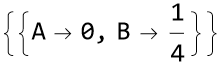

In [37]:
(*Separamos el resultado anterior en dos ecuaciones*)
(*para obtener los valores de A y B*)
ec1 = sust/.t->0;
ec2 = sust/.t->Pi/4;
valorAB = Solve[{ec1, ec2}]

t Sin[2 t]
C[1] Cos[2 t] + ---------- + C[2] Sin[2 t]
                    4
C[1]
2 C[2]
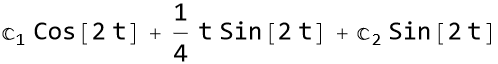

In [41]:
(*Construios la solución general de la no homogénea*)
(*y aplicamos las condiciones iniciales*)
Clear[y]
solgen = solhom + yp[t]/.{A->0, B->1/4}
dersolgen = D[solgen,t];
cond1 = solgen/.t->0
cond2 = dersolgen/.t->0

{{C[1] -> 0, C[2] -> 0}}
t Sin[2 t]
----------
    4
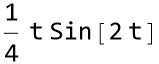

In [45]:
valorC= Solve[{cond1==0, cond2==0}]
Solgen = solgen/.valorC[[1]]

1                     (t + 4 C[2]) Sin[2 t]
(-- + C[1]) Cos[2 t] + ---------------------
 16                              4
t Sin[2 t]
----------
    4
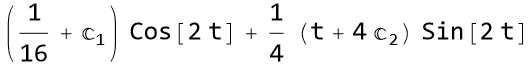
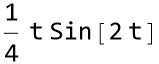

In [49]:
Clear[y,t]
(*Por ultimo comprobamos la solución general de la ecuación no homogénea*)
DSolveValue[y''[t] + 4 y[t] == Cos[2 t], y[t], t]//Simplify
DSolveValue[{y''[t] + 4 y[t] == Cos[2 t], y[0] == 0, y'[0] == 0}, y[t], t]//Simplify

-Graphics-
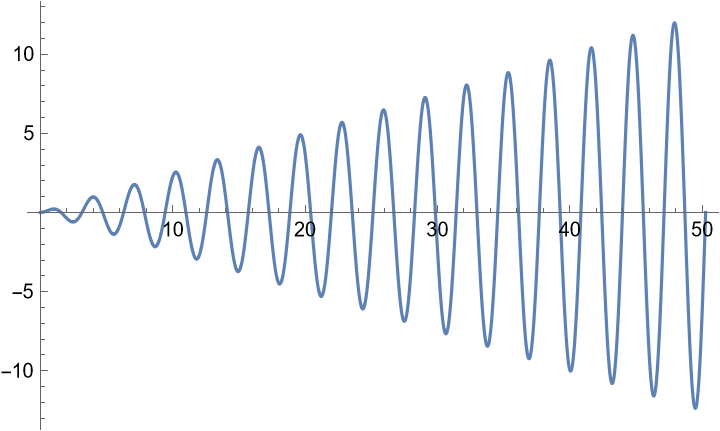

In [51]:
Plot[Solgen, {t, 0 , 16 Pi}]

##### <font color="orange"><b>Ecuaciones de orden superior</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i>Las ecuaciones no homogéneas de orden superior se resuelven de la misma manera que las ecuaciones de segundo orden, siempre que la función $f(x)$ involucre términos apropiados, aunque los cálculos pueden ser más complicados.</i>
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Resuleva:</i>
    
\begin{eqnarray*}
    &\text{(a) }& y''' + \frac{2}{3}y'' + \frac{145}{9}y' = e^{-t},\quad\ y(0) = 1,\quad\ y'(0) = 2, \quad\ y''(0) = 1 \\
    &\text{(b) }& y^{(8)} + \frac{7}{2}y^{(7)} + \frac{73}{2}y^{(6)} + \frac{229}{2}y^{(5)} + \frac{801}{2}y^{(4)} + 976y''' + 1168y''\\
    && + 640y' + 128y = te^{-t} + \sin(4t) + t.
\end{eqnarray*}

<i>El inciso (b) se deja como ejercicio.</i>
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<i>Utilizaremos Wolfram Language para resolver la ecuación.</i>

<b>Solución (a)</b>: <i>La ecuación homogénea correspondiente es $y''' + \frac{2}{3}y'' + \frac{145}{9}y' = 0$, la cual tiene como ecuación característica $k^3 + \frac{2}{3}k^2 + \frac{145}{9}k = 0$, procedemos a utilizar Wolfram para obtener las raíces</i>

</font>
</div>

2
k (145 + 6 k + 9 k )
--------------------
         9
         1                  1
{{k -> -(-) - 4 I}, {k -> -(-) + 4 I}, {k -> 0}}
         3                  3
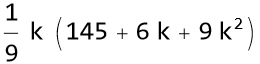
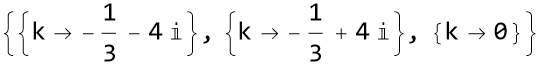

In [2]:
Clear[k]
Factor[k^3 + (2/3)k^2 + (145/9)k]
Solve[k^3 + (2/3)k^2 + (145/9)k == 0, k]

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<i>Por lo que la solución de la EDO homogenea es:</i>

\begin{equation*}
	y_h(x) = c_1 + e^{-t/3}\big(c_2\sin(4t) + c_3\cos(4t)\big)
\end{equation*}

<i>La cual tiene como conjunto fundamental de soluciones a $S = \{1,\, e^{-t/3}\sin(4t),\, e^{-t/3}\cos(4t)\}$.</i>

<i>Ahora busquemos la forma de la solución particular $y_p(x)$. Como $f(x) = e^{-t}$ Entonces $S = \{e^{-t}\}$ el cual no esta en el conjunto fundamental de soluciones de la ecuación homogénea, así que $y_p = A e^{-t}$, donde $A$ es el coeficiente indeterminado. Ahora procedemos a determinar el valor de $A$, sustituyendo la solución particular propuesta en al ecuación no homogénea</i>

</font>
</div>

A
-(--)
   t
  E
A
--
 t
E
  A
-(--)
   t
  E
9 + 148 A
--------- == 0
    t
   E
          9
{{A -> -(---)}}
         148
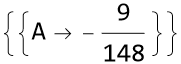

In [6]:
Clear[yp, A]
yp[t_] := A Exp[-t]
yp'[t]
yp''[t]
yp'''[t]
sust = Simplify[yp'''[t] + (2/3)yp''[t] + (145/9)yp'[t] == Exp[-t]]
coef = Solve[sust, A]

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<i>Por lo que la solución particular de la no homogenea es:</i>

\begin{equation*}
	y_p(x) = -\frac{9}{148}e^{-t}
\end{equation*}

<i>Y por lo tanto, la solución general de la ecuación no homogénea es:</i>

\begin{equation*}
	y(x) = y_h(x) + y_p(x) =  c_1 + e^{-t/3}\big(c_2\sin(4t) + c_3\cos(4t)\big) -\frac{9}{148}e^{-t}
\end{equation*}

<i>Podemos comprobarlo con Wolfram</i>

</font>
</div>

-9            -3 (12 C[1] + C[2]) Cos[4 t] - 3 (C[1] - 12 C[2]) Sin[4 t]
------ + C[3] + ----------------------------------------------------------
     t                                        t/3
148 E                                    145 E
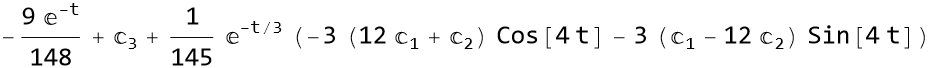

In [12]:
Clear[y]
SolGen = DSolveValue[y'''[t] + (2/3)y''[t] + (145/9)y'[t] == Exp[-t], y[t], t]//FullSimplify

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<i>Apliquemos las siguientes condiciones iniciales $y(0) = 1$, $y'(0) = 2$ y $y''(0) = -1$, y veamos la grafica de esta función. </i>

</font>
</div>

t    (2 t)/3
-2610 + 46472 E  + E        (-942 Cos[4 t] + 20729 Sin[4 t])
------------------------------------------------------------
                                 t
                          42920 E
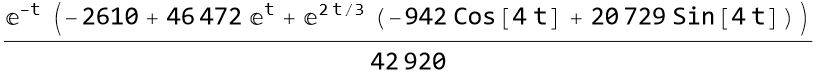

In [14]:
Clear[y]
SolGenVI = DSolveValue[{y'''[t] + (2/3)y''[t] + (145/9)y'[t] == Exp[-t], y[0] == 1, y'[0] == 2, y''[0] == -1}, y[t], t]//FullSimplify

-Graphics-
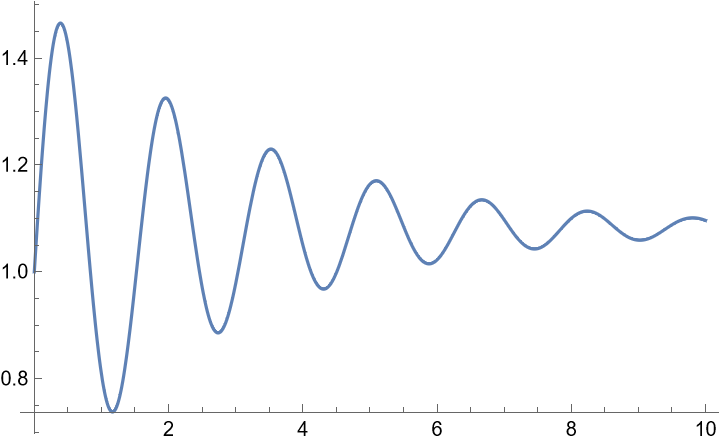

In [15]:
Plot[SolGenVI, {t, 0, 10}]

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejercicio</b>: <i>La ecuación de un oscilador armónico amortiguado y forzado esta dado por:</i>

\begin{equation*}
	\text{(1) } m\ddot{x} + c\dot{x} + kx = F(t),
\end{equation*}

<i>(a) Resolver la ecuación para una fuerza armónica de la forma $F(t) = F_0 \sin(\Omega t)$, con $F_0 = 100$ y $\Omega = 30$, $m = 2$, $c = 22$, $k = 21$ y con las condiciones iniciales $x(0) = 0$ y $\dot{x}(0) = 0$; (b) graficar $x(t)$, $\dot{x}(t)$ y $\ddot{x}(t)$ en el intervalo $0 < t < 15$.</i>
    
</font>
</div>

#### <font color="cyan"><b>Variación de Parametros</b></font>

##### <font color="orange"><b>Ecuaciones de segundo orden</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<i>Sea $S = \{y_1,\, y_2\}$ el conjunto fundamental de soluciones de la ecuación homogénea correspondiente $y''(x) + p(x)y'(x) + q(x)y(x) = 0$. Para resolver la ecuación no homogénea $y''(x) + p(x)y'(x) + q(x)y(x) = f(x)$, necesitamos encontrar una solución particular, $y_p(x)$ de la ecuación no homogénea. Buscamos una solución particular de la forma</i>

\begin{equation*}
	y_p(x) = u_1(x)y_1(x) + u_2(x)y_2(x),
\end{equation*}

<i>Sustituimos esta solución particular propuesta en la ecuación no homogénea. Primero obtenemos $y_p'$ y $y_p''$</i>

\begin{equation*}
	y_p'(x) = u_1'y_1 + u_1y_1' + u_2'y_2 + u_2y_2'.
\end{equation*}
        
</font>
</div>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">

<i>Asumiendo que</i>

\begin{equation}\label{eq:EDO2_VP1}
	y_1u_1' + y_2u_2' = 0,
\end{equation}

<i>resulta $y_p'(x) = u_1y_1' + u_2y_2'$. Entonces</i>

\begin{equation*}
	y_p''(x) = u_1'y_1' + u_1y_1'' + u_2'y_2' + u_2y_2''.
\end{equation*}

<i>Así que</i>

\begin{eqnarray*}
	y_p''(x) + p(x)y_p' + q(x)y_p &=& u_1'y_1' + u_1y_1'' + u_2'y_2' + u_2y_2'' \\
	&& + p(x)\big(u_1y_1' + u_2y_2'\big) + q(x)\big(u_1y_1 + u_2y_2\big) \\
	&=& u_1'y_1' + u_2'y_2' + u_1\big(y_1'' + p(x)y_1' + q(x)y_1\big) \\
	&& + u_2\big(y_2'' + p(x)y_2' + q(x)y_2\big) \\
	&=& u_1'y_1' + u_2'y_2'
\end{eqnarray*}

<i>Por lo tanto</i>

\begin{equation}\label{eq:EDO2_VP2}
	u_1'y_1' + u_2'y_2' = f(x)
\end{equation}
        
</font>
</div>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">

<i>Observe que las ecuaciones (\ref{eq:EDO2_VP1}) y (\ref{eq:EDO2_VP2}) forman un sistema de dos ecuaciones lineales para $u_1'$ y $u_2'$: </i>

\begin{equation*}
	y_1u_1' + y_2u_2' = 0 \\
	u_1'y_1' + u_2'y_2' = f(x)
\end{equation*}

<i>Aplicando la Regla de Cramer se tiene</i>

\begin{equation}\label{eq:EDO2_VP3}
	u_1' = \frac{\begin{vmatrix} 0 & y_2 \\ f(x) & y_2' \end{vmatrix}}{\begin{vmatrix} y_1 & y_2 \\ y_1' & y_2' \end{vmatrix}} = - \frac{y_2 f(x)}{W(S)} \quad\text{y}\quad\ u_2' = \frac{\begin{vmatrix} y_1 & 0 \\ y_1' & f(x) \end{vmatrix}}{\begin{vmatrix} y_1 & y_2 \\ y_1' & y_2' \end{vmatrix}} = \frac{y_1 f(x)}{W(S)}.
\end{equation}

<i>Donde $W(S)$ es el Wronskiano de $S = \{y_1,\, y_2\}$. Finalmente, para obtener $u_1$ y $u_2$ se integra con respecto a $x$.</i>
        
</font>
</div>

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Variación de Parámetros para ecuaciones de segundo orden</b>: <i>Dada la ecuación de segundo orden $a_2(x)y'' + a_1(x)y' + a_0(x)y = g(x)$</i>

<i>1. Dividir entre $a_2(x)$ para reescribir la ecuación en forma estándar, $y'' + p(x)y' + q(x)y = f(x)$.</i>

<i>2. Encontrar la solución general $y_h$, de la ecuación homogénea $y'' + p(x)y' + q(x)y = 0$.</i>

<i>3. Calcular el Wronskiano $W(S)$, con $S = \{y_1,\, y_2\}$.</i>

<i>4. Obtener $u_1' = -\frac{y_2 f(x)}{W(S)}$ y $u_2' = \frac{y_1 f(x)}{W(S)}$.</i>

<i>5. Integrar para obtener $u_1$ y $u_2$.</i>

<i>6. La solución particular de $a_2(x)y'' + a_1(x)y' + a_0(x)y = g(x)$ esta dada por $y_p = u_1y_1 + u_2y_2$.</i>

<i>7. Finalmente la solución general de $a_2(x)y'' + a_1(x)y' + a_0(x)y = g(x)$ esta dada por $y= y_h + y_p$.</i>
        
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Resolver</i>
    
\begin{eqnarray*}
    &\text{(a) }& y'' + 9y = \sec(3t),\quad\ y(0) = 0,\quad\ y'(0) = 0,\quad\ 0 \leq t \leq \pi/6 \\
    &\text{(b) }& y'' + 2y' + y = e^{-t}\ln(t)
\end{eqnarray*}
    
<i>El inciso (b) se deja de ejercicio</i>
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Solución (a)</b>: <i>Primero resolvemos la ecuación homogénea correspondiente $y'' + 9y = 0$. La ecuación característica es $k^2 + 9 = 0$, la cual tiene como raices $k_{1,2} = \pm 3i$. Por lo tanto la solución general de la ecuación homogénea es</i>
    
\begin{equation*}
    y_h = c_1\cos(3t) + c_2\sin(3t)
\end{equation*}
    
<i>Comprobemos el resultado con Wolfram Langauge</i>
    
</font>
</div>

In [16]:
Solve[k^2 + 9 == 0]
DSolve[y''[t] + 9 y[t] == 0, y[t], t]

{{k -> -3 I}, {k -> 3 I}}
{{y[t] -> C[1] Cos[3 t] + C[2] Sin[3 t]}}

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<i>Entonces el conjunto fundamental de soluciones de la ecuación homogpenea es $S = \{\cos(3t),\, \sin(3t)\}$, así que el Wronsquiano de $S$ es</i>.
    
\begin{equation*}
    W(S) = \begin{vmatrix} \cos(3t) & \sin(3t) \\ -3\sin(3t) & 3\cos(3t) \end{vmatrix} = 3
\end{equation*}
    
<i>Utilizamos las ecuaciones (\ref{eq:EDO2_VP3}) para obtener $u_1'$ y $u_2'$</i>
    
\begin{equation*}
	u_1' = -\frac{\sin(3t) \sec(3t)}{W(S)} = -\frac{\tan(3t)}{3} \quad\text{y}\quad\ u_2' = \frac{\cos(3t) \sec(3t)}{W(S)} = \frac{1}{3}.
\end{equation*}
    
<i>Comprobemos el resultado con Wolfram Langauge</i>
    
</font>
</div>

3
  1
-(-) Tan[3 t]
  3
1
-
3
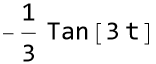

In [20]:
f[x_] := Sec[3 t]
Sh = {Cos[3 t], Sin[3 t]};
wr = Wronskian[Sh, t]
du1 = -Sh[[2]]*f[x]/wr
du2 = Sh[[1]]*f[x]/wr

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<i>Ahora integramos para obtener $u_1$ y $u_2$</i>
    
\begin{equation*}
	u_1 = -\int\frac{\tan(3t)}{3}dt = \frac{1}{9}\ln\big(\cos(3t)\big) \quad\text{y}\quad\ u_2 = \int\frac{1}{3}dt = \frac{1}{3}t.
\end{equation*}
    
<i>Comprobemos el resultado con Wolfram Langauge</i>
    
</font>
</div>

Log[Cos[3 t]]
-------------
      9
t
-
3
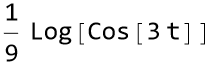

In [23]:
Integrate[du1,t]
Integrate[du2,t]

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<i>Entonces la solución particular es</i>
    
\begin{equation*}
	y_p = \frac{1}{9}\ln\big(\cos(3t)\big)\cos(3t) + \frac{1}{3}t\sin(3t)
\end{equation*}
    
<i>Y la solución general de la ecuación no homogénea es</i>
    
\begin{equation*}
	y = y_h + y_p= c_1\cos(3t) + c_2\sin(3t) + \frac{1}{9}\ln\big(\cos(3t)\big)\cos(3t) + \frac{1}{3}t\sin(3t)
\end{equation*}
    
<i>Solo falta aplicar las condiciones iniciales, esto lo haremos directamente con Wolfram.</i>
    
</font>
</div>

Cos[3 t] Log[Cos[3 t]] + 3 t Sin[3 t]
C[1] Cos[3 t] + C[2] Sin[3 t] + -------------------------------------
                                                  9
Cos[3 t] Log[Cos[3 t]] + 3 t Sin[3 t]
-------------------------------------
                  9
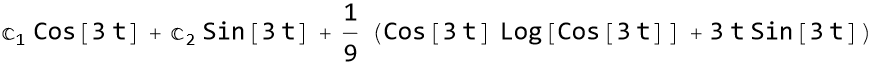
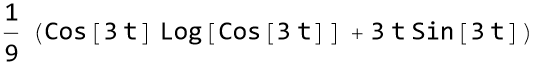

In [25]:
DSolveValue[y''[t] + 9 y[t] == Sec[3 t], y[t], t]
(*Aplicando las condiciones iniciales*)
SolGenVI = DSolveValue[{y''[t] + 9 y[t] == Sec[3 t], y[0] == 0, y'[0] == 0}, y[t], t]

-Graphics-
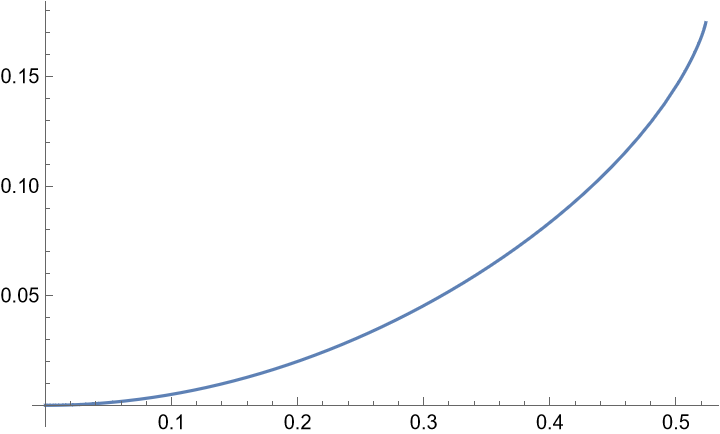

In [51]:
Plot[SolGenVI, {t,0, Pi/6}]

##### <font color="orange"><b>Ecuaciones de orden mayor</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<i>De la misma manera que con las ecuaciones de segundo orden, asumimos que una solución particular de la ecuación lineal y no homogénea de orden $n$</i>

\begin{equation*}
	y^{(n)} + a_{n-1}(t)y^{(n-1)} + \cdots + a_2(t)y'' + a_1(t)y' + a_0(t)y = f(t),
\end{equation*}

<i>tiene la forma $y_p = u_1(t)y_1 + u_2(t)y_2 + \cdots + u_n(t)y_n$, donde $S = \{y_1,\, y_1,\, \dots,\, y_n\}$ es un conjunto fundamental de soluciones de la ecuación homogénea correspondiente</i>

\begin{equation*}
	y^{(n)} + a_{n-1}(t)y^{(n-1)} + \cdots + a_2(t)y'' + a_1(t)y' + a_0(t)y = 0.
\end{equation*}

<i>Con las suposiciones</i>

\begin{eqnarray}\label{eq:EDOn_VP1}
	y_1 u_1' + y_2 u_2' + \cdots + y_n u_n' = 0, \\
	y_1' u_1' + y_2' u_2' + \cdots + y_n' u_n' = 0, \nonumber\\
	\vdots \nonumber\\
	y_1^{(n-2)} u_1' + y_2^{(n-2)} u_2' + \cdots + y_n^{(n-2)} u_n' = 0. \nonumber\\
\end{eqnarray}
    
</font>
</div>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">

<i>Obtenemos la ecuación</i>

\begin{equation}\label{eq:EDOn_VP2}
	y_1^{(n-1)} u_1' + y_2^{(n-1)} u_2' + \cdots + y_n^{(n-1)} u_n' = 0
\end{equation}

<i>Las ecuaciones (\ref{eq:EDOn_VP1}) y (\ref{eq:EDOn_VP2}) forman un sistema lineal de $n$ ecuaciones para las funciones $u_1',\, u_2',\, \dots,\, u_n'$. Aplicando la Regla de Cramer se tiene</i>

\begin{equation}\label{eq:EDOn_VP3}
	u_i' = \frac{W_i(S)}{W(S)},
\end{equation}

<i>Donde $W(S)$ esta dado por la ecuación (\ref{eq:Wronskiano})</i>

\begin{equation*}
	W(S) = 
	\begin{vmatrix}
		y_1 & y_2 & \cdots & y_n \\
		y'_1 & y'_2 & \cdots & y'_n \\
		\vdots & \vdots & \vdots & \vdots \\
		y^{(n-1)}_1 & y^{(n-1)}_2 & \cdots & y^{(n-1)}_n
	\end{vmatrix},
\end{equation*}
    
</font>
</div>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<i>Y $W_i(S)$ esta determinado por la matriz obtenida al remplazar la columna $i-esima$ de</i>

\begin{equation*}
	\begin{pmatrix}
		y_1 & y_2 & \cdots & y_n \\
		y'_1 & y'_2 & \cdots & y'_n \\
		\vdots & \vdots & \vdots & \vdots \\
		y^{(n-1)}_1 & y^{(n-1)}_2 & \cdots & y^{(n-1)}_n
	\end{pmatrix}\quad\text{por}\quad\
	\begin{pmatrix}
		0\\
		0 \\
		\vdots \\
		f(t)
	\end{pmatrix}
\end{equation*}

<i>Por ultimo, al igual que en las ecuaciones de segundo orden se integra para obtener $u_1,\, u_2,\, \dots,\, u_n$, y así la solución particular sería $y_p =u_1 y_1 + u_2 y_2 + \dots + u_n y_n$, y la solución general $y = y_h + y_p$.</i>

</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Resuelva (a) $y''' + 4y' = \sec(2t)$ y (b) $y''' + y' = \tan(x)$.</i>

<i>El inciso (b) se deja como ejercicio.</i>

<b>Solución (a)</b>: <i>La ecuación homogénea correspondiente es $y''' + 4y' = 0$ , su ecuación característica es $k^3 + 4k = k(k^2 + 4) = 0$ y sus raíces son $k_1 = 0,\,\, k_2 = 2i\,\text{y }\, k_3 = -2i $. Entonces la solución general de la ecuación homogénea es</i>

\begin{equation*}
	y_h = c_1 + c_2\cos(2t) + c_3\sin(2t).
\end{equation*}

<i>El conjunto fundamental de soluciones de la ecuación homogénea es $S = \{1,\, \cos(2t),\, \sin(2t)\}$ y el Wrosnkiano de este conjunto es $W(S) = 8$ (todo esto lo podemos comprobar con Wolfram).</i>
    
</font>
</div>

2
k (4 + k )
{{k -> 0}, {k -> -2 I}, {k -> 2 I}}
       C[2] Cos[2 t]   C[1] Sin[2 t]
C[3] - ------------- + -------------
             2               2
8
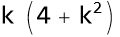
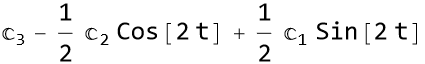

In [29]:
Factor[k^3 + 4 k]
Solve[k^3 + 4 k == 0]
DSolveValue[y'''[t] + 4 y'[t] == 0, y[t], t]
Wronskian[{1, Cos[2 t], Sin[2 t]}, t]

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<i>Lo siguiente es obtener $u_1',\, u_2'\, \text{y } u_3'$ e integrando se obtiene:</i>
    
\begin{eqnarray*}
    u_1 &=& \frac{1}{8} \ln|\sec(2t) + \tan(2t)|, \\
    u_2 &=& -\frac{t}{4}, \\
    u_3 &=& \frac{1}{8} \ln|\cos(2t)|
\end{eqnarray*}
    
</font>
</div>

In [35]:
s = {1, Cos[2 t], Sin[2 t]};
f[t_] := Sec[2 t]
mws = {s, D[s, t], D[s, {t,2}]}
ws = Det[mws]//Simplify
Wronskian[s, t]

{{1, Cos[2 t], Sin[2 t]}, {0, -2 Sin[2 t], 2 Cos[2 t]}, {0, -4 Cos[2 t], -4 Sin[2 t]}}
8
8

{{0, Cos[2 t], Sin[2 t]}, {0, -2 Sin[2 t], 2 Cos[2 t]}, {0, -4 Cos[2 t], -4 Sin[2 t]}}
{{0, Cos[2 t], Sin[2 t]}, {0, -2 Sin[2 t], 2 Cos[2 t]}, 
 
>   {Sec[2 t], -4 Cos[2 t], -4 Sin[2 t]}}
Sec[2 t]
--------
   4
-Log[Cos[t] - Sin[t]] + Log[Cos[t] + Sin[t]]
--------------------------------------------
                     8
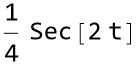
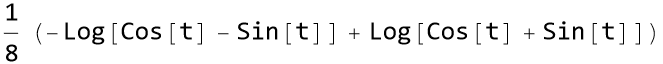

In [38]:
mw1a = ReplacePart[mws, {_, 1} -> 0]
mw1 = ReplacePart[mw1a, {3, 1} -> f[t]]
du1 = Det[mw1]/ws//Simplify
u1 = Integrate[du1, t]//Simplify

{{1, 0, Sin[2 t]}, {0, 0, 2 Cos[2 t]}, {0, Sec[2 t], -4 Sin[2 t]}}
  1
-(-)
  4
  1
-(-) t
  4
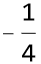
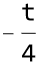

In [43]:
mw2a = ReplacePart[mws, {_, 2} -> 0];
mw2 = ReplacePart[mw2a, {3, 2} -> f[t]]
du2 = Det[mw2]/ws//Simplify
u2 = Integrate[du2, t]//Simplify

{{1, Cos[2 t], 0}, {0, -2 Sin[2 t], 0}, {0, -4 Cos[2 t], Sec[2 t]}}
  1
-(-) Tan[2 t]
  4
Log[Cos[2 t]]
-------------
      8
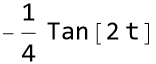
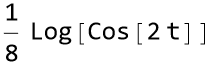

In [47]:
mw3a = ReplacePart[mws, {_, 3} -> 0];
mw3 = ReplacePart[mw3a, {3, 3} -> f[t]]
du3 = Det[mw3]/ws//Simplify
u3 = Integrate[du3, t]//Simplify

2
(8 C[3] - 8 C[2] Cos[t]  - 2 t Cos[2 t] - Log[Cos[t] - Sin[t]] + Log[Cos[t] + Sin[t]] + 
 
>     (4 C[1] + Log[Cos[2 t]]) Sin[2 t]) / 8
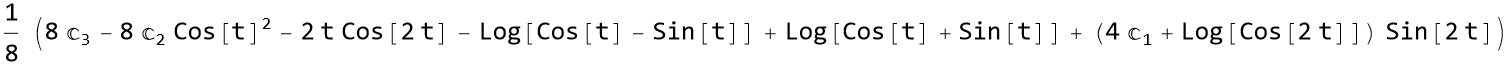

In [50]:
DSolveValue[y'''[t] + 4 y'[t] == Sec[2 t], y[t], t]//FullSimplify

### <font color="gren"><b>Ecuación de Cauchy-Euler</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i> Generalmente, resolver una ecuación diferencial arbitraria resulta una tarea formidable, sino es que imposible, particularmente en el caso cuando los coeficientes no son constantes. Sin embargo, somos capaces de resolver ciertas ecuaciones con coeficientes variables utilizando técnicas similares a los discutidos anteriormente</i>
    
</font>
</div>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición (Ecuación de Cauchy-Euler)</b>: <i>Una <b>ecuación diferencial de Cauchy-Euler</b> es una ecuación de la forma</i>
    
\begin{equation}\label{eq:ED_CE}
    a_n x^n y^{(n)} + a_{n-1} x^{n-1} y^{(n-1)} + \cdots + a_1 x y' + a_0 y = f(x)
\end{equation}
    
</font>
</div>

#### <font color="cyan"><b>Ecuación de Cauchy-Euler de segundo orden</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<i>Considere la ecuación homogenea de segundo orden de Cauchy-Euler</i>

\begin{equation}\label{eq:ED_CE2}
	ax^2 y'' + bxy' + cy = 0
\end{equation}

<i>donde $a \neq 0$. Observe que el coeficiente de $y''$ es cero si $x = 0$, restringiendo nuestro dominio a $x > 0$ o $x < 0$ para asegurar la teoría de ecuaciones de segundo orden se cumpla.</i>

<i>Supondremos que $y'' = x^m$, $x > 0$, para alguna constante $m$. Sustituyendo $y = x^m$ junto con sus derivadas $y' = mx^{m-1}$ y $y'' = m(m-1)x^{m-2}$ en la ecuación (\ref{qe:ED_CE2}) obtenemos</i>

\begin{eqnarray*}
	ax^2 y'' + bxy' + cy &=& am(m-1)x^m + bmx^m + cx^m\\
	&=& x^m \big[am(m-1) + bm + c\big] = 0.
\end{eqnarray*}

<i>Entonces, $y = x^m$ es solución de la ecuación (\ref{eq:ED_CE2}) si $m$ satisface</i>

\begin{equation}\label{eq:eq_car_CE}
	am(m-1) + bm + c = 0,
\end{equation}

<i>la cual es llamada <b>ecuación característica</b> (o <b>ecuación auxiliar</b>) asociada a la ecuación de Cauchy-Euler de segundo orden. La solución de la ecuación característica determina completamente la solución general de la ecuación homogenea de segundo orden de Cauchy-Euler.</i>
    
</font>
</div>

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Teorema</b>: <i>Sean $m_1$ y $m_2$ las raíces de la ecuación (\ref{eq:eq_car_CE})</i>

> <i>Si $m_1 \neq m_2$ son reales y distintos, dos soluciones independientes de la ecuación (\ref{eq:ED_CE2}) son $y_1 = x^{m_1}$ y $y_2 = x^{m_2}$; así que, la solución general es</i>
\begin{equation*}
	y = c_1 x^{m_1} + c_2 x^{m_2}, \quad\ x > 0.
\end{equation*}

> <i>Si $m_1 = m_2$, las dos soluciones independientes de la ecuación (\ref{eq:ED_CE2}) son $y_1 = x^{m_1}$ y $y_2 = x^{m_1} \ln(x)$; así que, la solución general es</i>
\begin{equation*}
	y = c_1 x^{m_1} + c_2 x^{m_1} \ln(x), \quad\ x > 0.
\end{equation*}

> <i>Si $m_{1,2} = \alpha \pm \beta i,\,\beta \neq 0$, dos soluciones independientes de la ecuación (\ref{eq:ED_CE2}) son $y_1 = x^\alpha \cos\big(\beta\ln(x)\big)$ y $y_2 = x^\alpha \sin\big(\beta\ln(x)\big)$; así que, la solución general es</i>
\begin{equation*}
	y = x^\alpha \left[c_1 \cos\big(\beta\ln(x)\big) + c_2 \sin\big(\beta\ln(x)\big)\right], \quad\ x > 0.
\end{equation*}
        
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Resuelva cada una de las siguientes ecuaciones: (a) $3x^2 y'' - 2xy' + 2y = 0,\,\ x > 0$; (b) $x^2 y'' - xy' + y = 0,\,\ x > 0$ ; (c) $x^2 y'' - 5xy' + 10y = 0,\,\ x > 0$</i>

<b>Solución (a)</b>: <i>Si $y = x^m$, $y' = mx^{m-1}$ y $y'' = m(m-1)x^{m-2}$, sustituyendo en la ecuación diferencial tenemos</i>

\begin{eqnarray*}
	3x^2 y'' - 2xy' + 2y &=& 3x^2 m(m-1)x^{m-2} - 2xmx^{m-1} + 2x^m \\
	&=& x^m \big[3m(m-1) - 2m + 2\big]  = 0.
\end{eqnarray*}

<i>Entonces la ecuación auxiliar es</i>

\begin{equation*}
	3m(m-1) - 2m + 2 = 3m(m-1) - 2(m-1) = (3m-2)(m-1) = 0
\end{equation*}

<i>con raíces $m_1 = \frac{2}{3}$ y $m_2 = 1$. Entonces, la solución general es $y = c_1 x^{2/3} + c_2 x$. Puede comprobar que se obtiene el mismo resultado en Wolfram. Los incisos (b) y (c) se dejan como ejercicios</i>
    
</font>
</div>

In [ ]:
Clear[x, y, solgen]
solgen = DSolveValue[3 x^2 y''[x] - 2 x y'[x] + 2 y[x] == 0, y[x], x]

2/3
x    C[1] + x C[2]

-Graphics-
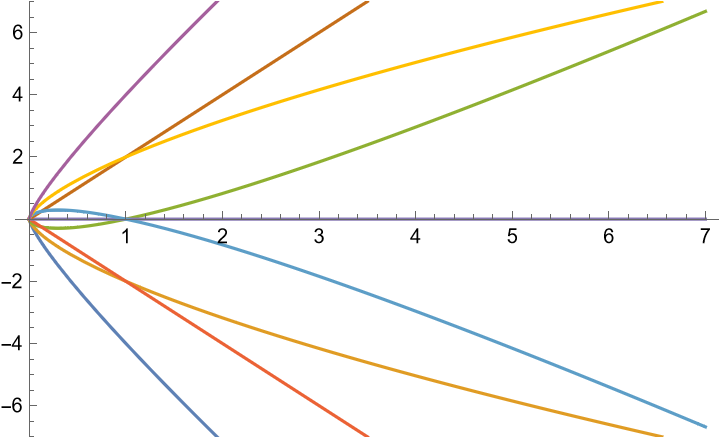

In [ ]:
(*Podemos graficar algunas soluciones, para algunos valores de c1 y c2*)
solgenc1c2 = Table[solgen/. {C[1] -> i, C[2] -> j}, {i, -2, 2, 2}, {j, -2, 2, 2}];
Plot[Evaluate[solgenc1c2], {x, 0, 7}, PlotRange -> {-7, 7}]

#### <font color="cyan"><b>Ecuación de Cauchy-Euler de orden superior</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<i>La ecuación auxiliar de las ecuaciones de Cauchy-Euler de orden superior se define de la misma manera y las soluciones de ecuaciones de Cauchy-Euler homogéneas de orden superior se determinan de la misma manera que las soluciones que las ecuaciones diferenciales homogéneas de orden superior con coeficientes constantes. En el caso de las ecuaciones de Cauchy-Euler de orden superior, tenga en cuenta que si una raíz real $r$ de la ecuación auxiliar se repite $m$ veces, $m$ soluciones linealmente independientes que corresponden a $r$ son $x^r,\,\ x^r \ln(x),\,\ x^r \big(\ln(x)\big)^2,\,\dots,\,\ x^r \big(\ln(x)\big)^{m-1}$; soluciones correspondientes a raíces complejas repetidas se generan de forma similar.</i>
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Resolver $x^4 y^{(4)} + 4x^3 y''' + 11x^2 y'' - 9x y' + 9y = 0,\,\ x > 0$ con los valores iniciales $y(1) = 1,\,\ y'(1) = -9,\,\ y''(1) = 27,\,\ y'''(1) = 1$.</i>
    
<b>Solución</b>: <i>Resolveremos este ejemplo con Wolfram Language.</i>
    
</font>
</div>

In [ ]:
(*Primero evaluamos las derivadas de la función y = x^m*)
yp[x_] := x^m
yp'[x]
yp''[x]
yp'''[x]
D[yp[x], {x, 4}]

-1 + m
m x
            -2 + m
(-1 + m) m x
                     -3 + m
(-2 + m) (-1 + m) m x
                              -4 + m
(-3 + m) (-2 + m) (-1 + m) m x

2       2   m
(-1 + m)  (9 + m ) x  == 0
        2       2
(-1 + m)  (9 + m ) == 0
{{m -> -3 I}, {m -> 3 I}, {m -> 1}, {m -> 1}}
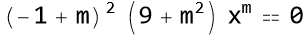
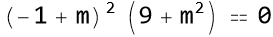

In [ ]:
(*Ahora obtenemos la ecuación auxiliar*)
eqd = x^4 D[yp[x], {x, 4}] + 4 x^3 yp'''[x] + 11 x^2 yp''[x] - 9 x yp'[x] + 9 yp[x] == 0//Factor
ecaux = eqd/.x^m->1
(*y las raíces de la ecuación auxiliar*)
Raices = Solve[ecaux, m]

In [ ]:
(*Con esas raices se puede escribir la solución general*)
(*la comparamos con la solucion que nos da DSolve*)
Clear[x, y]
ecd = x^4 D[y[x], {x, 4}] + 4 x^3 y'''[x] + 11 x^2 y''[x] - 9 x y'[x] + 9 y[x] == 0;
DSolveValue[ecd, y[x], x]

x C[3] + C[1] Cos[3 Log[x]] + x C[4] Log[x] + C[2] Sin[3 Log[x]]

-72 Cos[3 Log[x]] + 3 x (34 - 35 Log[x]) - 89 Sin[3 Log[x]]
-----------------------------------------------------------
                            30
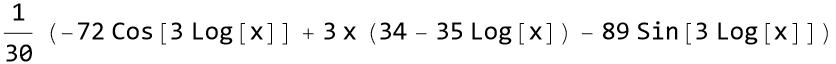

In [ ]:
(*Resolvamos la ED con los valores i iciales*)
solgen = DSolveValue[{ecd, y[1] == 1, y'[1] == -9, y''[1] == 27, y'''[1] == 1}, y[x], x]//Simplify

-Graphics-
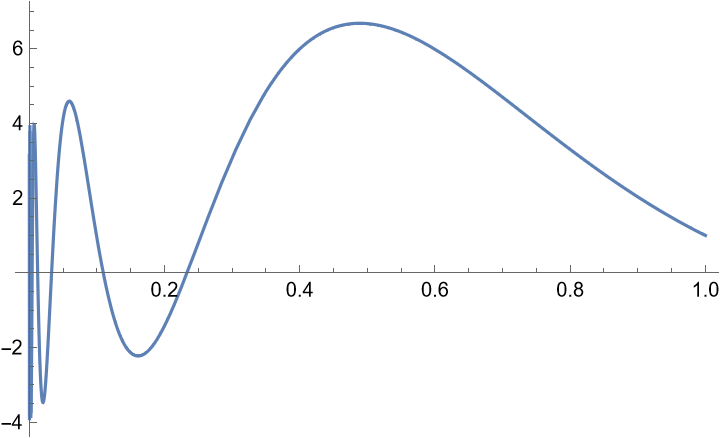

In [ ]:
(*Por ultimo graficamos la solucion del problema con valores iniciales*)
Plot[solgen, {x, 0, 1}]

#### <font color="cyan"><b>Variación de parametros</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i>Por supuesto, las ecuaciones de Cauchy-Euler pueden ser no homogéneas, en cuyo caso se puede utilizar el método de variación de parámetros, visto anteriormente.</i>    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Resuelva $x^2 y'' - xy' + 5y = x,\,\ x >0$</i>

<b>Solución</b>: <i>Se deja como ejercicio, puede utilizar Wolfram Language para resolverlo. Se recomienda que aplique los métodos aquí expuestos y se ayude con Wolfram en los pasos que le sean necesarios (el comando DSolve solo utilícelo para comprobar el resultado).</i>
    
</font>
</div>

### <font color="gren"><b>Soluciones en serie</b></font>

### <font color="gren"><b>EDO no lineales</b></font>